<a href="https://colab.research.google.com/github/jhonegonzalezq/opti-bio/blob/main/Analisis_Biliometrico_EC8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1g1wJR5QixG-7LhTavm5Egpk34TU1JfuD?usp=sharing)



############################################################################

 Created by: Prof. Valdecy Pereira, D.Sc.
 UFF - Universidade Federal Fluminense (Brazil)
 email:  valdecy.pereira@gmail.com
 pyBibX - A Bibliometric and Scientometric Library
 Example - Scopus

 Citation:
 PEREIRA, V.; BASILIO, M.P.; SANTOS, C.H.T. (2025). PyBibX: A Python Library for Bibliometric and
 Scientometric Analysis Powered with Artificial Intelligence Tools. Data Technologies and Applications.
 Vol. ahead-of-print No. ahead-of-print. doi: https://doi.org/10.1108/DTA-08-2023-0461

############################################################################

In [117]:
!pip install pybibx
!pip install tabulate

In [118]:
!pip install --upgrade --force-reinstall numpy==1.26.4 pandas

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached pandas-2.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstal

In [4]:
# Dowload .bib file
!wget  scopus.bib https://github.com/jorgeiv500/opti-bio/raw/main/scopus(113).bib # se puede cambiar por scopus_1, scopus_2, scopus_3
#!wget https://github.com/Valdecy/pyBibX/raw/main/assets/bibs/scopus.bib

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `wget  scopus.bib https://github.com/jorgeiv500/opti-bio/raw/main/scopus(113).bib # se puede cambiar por scopus_1, scopus_2, scopus_3'


In [2]:
# Required Libraries
import numpy as np
import pandas as pd
import textwrap

from google.colab import data_table
from tabulate import tabulate
from prettytable import PrettyTable
from pybibx.base import pbx_probe

# Load Dataset
---
In this section, we will load and inspect the dataset.

In [5]:
# Load .bib
# Arguments: file_bib = 'filename.bib'; db = 'scopus', 'wos', 'pubmed'; del_duplicated = True, False
file_name = 'scopus(113).bib'
database  = 'scopus'
bibfile   = pbx_probe(file_bib = file_name, db = database, del_duplicated = True)

A Total of 112 Documents were Found ( 112 Documents and 0 Duplicates )

Article = 99
Conference paper = 13


In [6]:
# Health Analysis
health = bibfile.health_bib()

# Check Health
health

Entries Completeness (%) Number of  Docs
0             Sources          100.00%             112
1           Abstracts          100.00%             112
2         Affiliation          100.00%             112
3           Author(s)          100.00%             112
4                 DOI           96.43%             108
5  Keywords - Authors           88.39%              99
6     Keywords - Plus           83.04%              93
7          References            0.00%               0
8                Year          100.00%             112

In [7]:
# Generate EDA (Exploratory Data Analysis) Report
report  = bibfile.eda_bib()

# Check Report
report

Main Information    Results
0                                Timespan  2002-2025
1               Total Number of Countries         52
2            Total Number of Institutions        247
3                 Total Number of Sources         94
4              Total Number of References          0
5               Total Number of Languages          2
6                   --chinese (# of docs)          2
7                   --english (# of docs)        110
8                                    -//-       -//-
9               Total Number of Documents        112
10                              --Article         99
11                     --Conference paper         13
12           Average Documents per Author       1.05
13      Average Documents per Institution       2.25
14           Average Documents per Source       1.19
15             Average Documents per Year       6.22
16                                   -//-       -//-
17                Total Number of Authors        531
18       Total Number of Authors Keywords        414
19  Total Number of Authors Keywords Plus       1341
20        Total Single-Authored Documents          5
21         Total Multi-Authored Documents        107
22            Average Collaboration Index       4.91
23                            Max H-Index          2
24                                   -//-       -//-
25              Total Number of Citations       1493
26           Average Citations per Author       2.81
27      Average Citations per Institution       6.04
28         Average Citations per Document      13.33
29           Average Citations per Source      15.88
30                                   -//-       -//-

In [8]:
# The metadata can be reviewed and manually modified. If you need to make adjustments, you can directly edit the bibfile.data, which is a DataFrame containing all the utilized information.
print(tabulate(bibfile.data.head(n = 10), headers = 'keys', tablefmt = 'psql'))
# Modify 'bibfile.data' as needed.

+----+---------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [9]:
# Check Docs IDs
data_table.DataTable(bibfile.table_id_doc, num_rows_per_page = 15)

In [10]:
# Check Docs IDs per Type
data_table.DataTable(bibfile.id_doc_types(), num_rows_per_page = 15)

In [11]:
# Check Authors IDs
data_table.DataTable(bibfile.table_id_aut, num_rows_per_page = 15)

In [12]:
# These indices are local (considers only the .bib scope)
# H-index measures their academic impact by identifying the number of papers (h) that have each received at least h citations
# E-Index quatifies excess citations within the H-core revealing "hidden" impact beyond the H-index threshold.
# The G-Index emphasizes highly cited work, making it sensitive to breakthrough publications.
# The M-Index contextualizes the H-index by normalizing it over the researcher’s career duration
aut_m = bibfile.m_index(2022)
df_idx = {
    'Author': bibfile.u_aut,
    'H-index': bibfile.aut_h,
    'E-Index': bibfile.aut_e,
    'G-Index': bibfile.aut_g,
    'M-Index': aut_m
}

df_idx = pd.DataFrame(df_idx)
df_idx

Author  H-index   E-Index  G-Index   M-Index
0          abdelfattah, walid        0  0.000000        0  0.000000
1    abosaoda, munthar kadhim        0  0.000000        0  0.000000
2      abreu-naranjo, reinier        1  0.000000        1  1.000000
3                 adak, tapas        0  0.000000        0  0.000000
4              adams, derrick        1  5.291503        1  1.000000
..                        ...      ...       ...      ...       ...
526             zhonglin, yin        0  0.000000        0  0.000000
527             zhou, lianzhu        1  1.000000        1  1.000000
528           zhou, shuncheng        1  1.732051        1  1.000000
529             zhou, xinmiao        1  0.000000        1  1.000000
530    zimmermann, niklaus e.        1  8.831761        1  0.166667

[531 rows x 5 columns]

In [13]:
# Check Sources IDs
data_table.DataTable(bibfile.table_id_jou, num_rows_per_page = 15)

In [14]:
# Check Institutions IDs
data_table.DataTable(bibfile.table_id_uni, num_rows_per_page = 15)

In [15]:
# Check Countries IDs
data_table.DataTable(bibfile.table_id_ctr, num_rows_per_page = 15)

In [16]:
# Check Authors Keywords IDs
data_table.DataTable(bibfile.table_id_kwa, num_rows_per_page = 15)

In [17]:
# Check Keywords Plus IDs
data_table.DataTable(bibfile.table_id_kwp, num_rows_per_page = 15)

In [18]:
# Check Reference IDs (If References are Given)
df = pd.DataFrame({'Reference': bibfile.u_ref, 'Reference ID': bibfile.u_ref_id})
data_table.DataTable(df, num_rows_per_page = 15)

# Exploratory Data Analysis
---
In this section, we will perform EDA

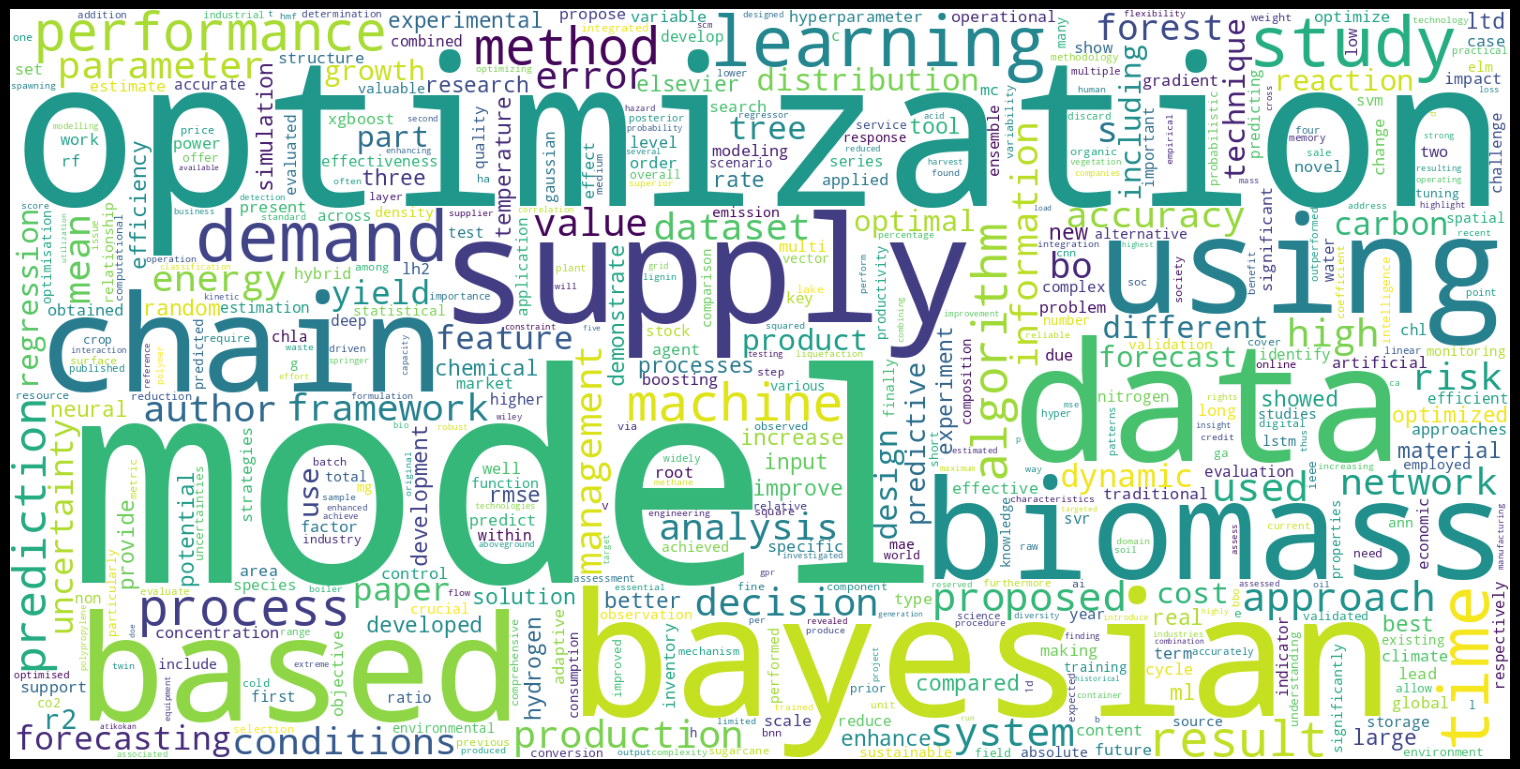

In [19]:
# WordCloud from the Abstracts, Title, Authors Keywords or Keywords Plus
# Arguments: entry             = 'abs', 'title', 'kwa', or 'kwp'
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
bibfile.word_cloud_plot(entry = 'abs', size_x = 15, size_y = 10, wordsn = 500, rmv_custom_words = [])

In [20]:
# Check Table
num_columns = 5
data_wd     = bibfile.ask_gpt_wd
items       = list(data_wd.items())

field_names = []
for i in range(num_columns):
    field_names.append(f"Word {i + 1}")
    field_names.append(f"Importance {i + 1}")

table = PrettyTable()
table.field_names = field_names

for i in range(0, len(items), num_columns):
    row = []
    for j in range(num_columns):
        if i + j < len(items):
            word, importance = items[i + j]
            row.extend([word, round(importance, 4)])
        else:
            row.extend(["", ""])
    table.add_row(row)

# Print the table
print(table)

+-----------------+--------------+----------------+--------------+--------------+--------------+---------------+--------------+---------------+--------------+
|      Word 1     | Importance 1 |     Word 2     | Importance 2 |    Word 3    | Importance 3 |     Word 4    | Importance 4 |     Word 5    | Importance 5 |
+-----------------+--------------+----------------+--------------+--------------+--------------+---------------+--------------+---------------+--------------+
|      model      |     1.0      |  optimization  |    0.4543    |   bayesian   |     0.42     |      data     |    0.3857    |     supply    |    0.3086    |
|      based      |    0.3057    |    biomass     |    0.2857    |    chain     |    0.2686    |     using     |    0.2686    |    learning   |    0.2514    |
|      demand     |    0.2514    |      time      |    0.2429    |    study     |     0.24     |  performance  |    0.2314    |    machine    |    0.2114    |
|      method     |    0.2086    |    process 

In [21]:
# N-Grams
# Arguments: view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry      = 'abs', 'title', 'kwa', or 'kwp'
#            n_grams    = An integer with size n (representing the most common groups of words with size n)
#            stop_words = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                         'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                         'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Portuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                         'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus
#             wordsn           = Number of N-Grams
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwp', ngrams = 3, stop_words = [], rmv_custom_words = [], wordsn = 15)

In [22]:
# Check Table
data_ng = bibfile.ask_gpt_ng
data_table.DataTable(data_ng, num_rows_per_page = 15)

In [26]:
# Documents Projection based on Words. (An interactive plot). It returns the Projection (each document coordinate) and the Labels (each document cluster)
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            custom_label      = A list of custom labels for each document. The user can define each document cluster;
#            custom_projection = A list of custom coordinates for each document. The user can define each document coordinate;
#            n_components      = Number of Dimensions;
#            n_clusters        = Only relevant if  cluster_method = 'kmeans'.Number of Clusters.;
#            node_labels       = If True, labels appear in nodes;
#            node_size         = Node size;
#            node_font_size    = Node font size;
#            tf_idf            = True or False (True -> The Cluster Algorithm will use the DTM to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label);
#            embeddings        = True or False (True -> The Cluster Algorithm will use the Word Embeddings to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label);
#            model             = Only relevant if 'embeddings = True'. Specifies the used AI model. The default value is 'allenai/scibert_scivocab_uncased';
#            method            = 'tsvd' or 'umap' ('tsvd' -> Truncated SVD projection method is used. 'umap' -> UMAP projection method is used);
#            showlegend        = If True, shows legend;
#            cluster_method    = 'kmeans' or 'hdbscan';
#            min_size          = Only relevant if  cluster_method = 'hdbscan'. Minimum number of elements in a Cluster;
#            max_size          = Only relevant if  cluster_method = 'hdbscan'. Maximum number of elements in a Cluster
projection, labels = bibfile.docs_projection(view              = 'notebook',
                                             corpus_type       = 'abs',
                                             stop_words        = ['en'],
                                             rmv_custom_words  = [],
                                             custom_label      = [],
                                             custom_projection = [],
                                             n_components      = 2,
                                             n_clusters        = 4,
                                             node_labels       = True,
                                             node_size         = 12,
                                             node_font_size    = 4,
                                             tf_idf            = False,
                                             embeddings        = False,
                                             model             = 'allenai/scibert_scivocab_uncased',
                                             method            = 'umap',
                                             showlegend        = True,
                                             cluster_method    = 'kmeans',
                                             min_size          = 4,
                                             max_size          = 50
                                             )

In [27]:
# Check Table
data_pr = pd.DataFrame(np.hstack([projection, labels.reshape(-1,1)]))
data_table.DataTable(data_pr, num_rows_per_page = 15)

In [28]:
# Check Articles per Cluster
cluster      = 4
idx_articles = [i for i in range(0, labels.shape[0]) if labels[i] == cluster]
print(*idx_articles, sep = ', ')

In [29]:
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            key               = 'abs', 'title', 'jou, 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            topn              = Total number entities;
#            txt_font_size     = Font size of the text inside the bins;
#            start             = Start Year; -1 = all years
#            end               = End Year;   -1 = all years
bibfile.plot_evolution_year(view             = 'notebook',
                            stop_words       = [],
                            rmv_custom_words = [],
                            key              = 'kwa',
                            topn             = 10,
                            txt_font_size    = 12,
                            start            = 2010,
                            end              = 2025)

In [30]:
# View Table
data_ep = bibfile.ask_gpt_ep
print(textwrap.fill(data_ep, 150))

 2010: supply chain (1), demand forecasting (1), bayesian methods (1), state space models (1), forecasting practice (1) 2011: forecasting (1),
seasonal demand (1), probabilistic inference (1), multiply sectioned bayesian networks (1), multiagent systems (1), incomplete data set (1), graphical
models (1), bayesian networks (1), bayesian forecasting method (1) 2012: uncertainty modeling (1), information sharing (1), franchisor-franchisee
supply chain (1), b2b markets (1), asymmetric information (1) 2013: bayesian forecasting (1), zero demand points (1), tourism forecast (1), supply
chain planning (1), spain (1), holt-winters model (1), exponential smoothing (1), censored data (1) 2016: water-use efficiency (1), forecasts (1),
bayesian statistics (1), carbon allocation (1), co<sub>2</sub> fertilisation (1), conservation agriculture (1), cover crop (1), dynamic linear models
(1), inventory models (1), tree rings (1) 2017: forest management (1), spatial planning (1), process-based models (1

In [31]:
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn              = Most frequent n words
#            custom            = Plot specific words
bibfile.plot_evolution_year_complement(data_ep, view = 'notebook', topn = 20, custom = [])

In [32]:
# Sankey Diagram (An interactive plot)
# Arguments:
#   view         : Determines the rendering mode.'notebook' -> Plots in your preferred Notebook app. 'browser'  -> Plots in your preferred browser window.
#   entry        : A list defining the sequence of data columns to be visualized. Allowed keys: 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan'
#   rmv_unknowns : Boolean flag controlling how unknown entries are handled. True  -> Remove any relationships that include 'unknown'.
#   topn         : Specifies the maximum number of top entities/connections to display at each level. Set to "None" for no filtering or provide a list with limits corresponding to each connection between the nodes defined in 'entry'.
bibfile.sankey_diagram(view = 'notebook', entry = ['aut', 'cout', 'lan'], topn = [10, 15], rmv_unknowns = True)

# PS: The white bars can be dragged

In [33]:
# View Table
data_sk = bibfile.ask_gpt_sk
data_table.DataTable(data_sk, num_rows_per_page = 15)

In [34]:
# Plot Count Y per X (An interactive bar chart)
# Arguments:
#   view          : Determines where the plot will be rendered. 'browser'  -> Plots in your preferred browser window. 'notebook' -> (if supported) Plots within your notebook environment.
#   rmv_unknowns  : Boolean flag to handle unknown entries. True  -> Removes any relationships containing unknown values.
#   x             : The key (column) to use for the X-axis. Must be one of: 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan'. Default is 'cout'.
#   y             : The key (column) to use for the Y-axis. Must be one of: 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan'. Default is 'aut'.
#   topn_x        : Maximum number of top X categories (based on total counts) to display. Default is 5.
#   topn_y        : Maximum number of top Y entries (per X category) to display. Default is 5.
#   text_font_size: Font size for the text labels displayed inside the bars. Default is 12.
#   x_angle       : Angle (in degrees) for the X-axis tick labels. Default is -90 (rotating labels vertically).
bibfile.plot_count_y_per_x(view = 'notebook', rmv_unknowns = True, x = 'cout', y = 'aut', topn_x = 5, topn_y = 5, text_font_size = 12, x_angle = -90)

In [35]:
# View Table
data_table.DataTable(bibfile.top_y_x, num_rows_per_page = 15)

In [36]:
# Tree Map
# Arguments: view          = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry         = 'kwp', 'kwa', 'aut', 'jou', 'ctr', or 'inst';
#            topn          = Total number entities
#            txt_font_size = Font size of the text inside the bins;
bibfile.tree_map(view = 'notebook', entry = 'jou', topn = 30)

In [37]:
# Authors Productivity Plot (An interactive plot). It informs for each year the documents (IDs) published for each author
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn = Total number entities
bibfile.authors_productivity(view = 'notebook', topn = 20)

In [38]:
# View Table
data_ap = bibfile.ask_gpt_ap
data_table.DataTable(data_ap, num_rows_per_page = 15)

In [39]:
# Countries Productivity Plot (An interactive plot). It informs the production for each Country (count is made considering each doc author)
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
bibfile.countries_productivity(view = 'notebook')

In [40]:
# View Table
data_cp = bibfile.ask_gpt_cp
data_table.DataTable(data_cp, num_rows_per_page = 15)

In [41]:
# Institutions Productivity Plot (An interactive plot). It informs for each year the documents (IDs) published for each institution
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn = Total number entities
bibfile.institution_productivity(view = 'notebook', topn = 20)

In [42]:
# View Table
data_ip = bibfile.ask_gpt_ip
data_table.DataTable(data_ip, num_rows_per_page = 15)

In [43]:
# Sources Productivity Plot (An interactive plot). It informs for each year the documents (IDs) published for each source (journal)
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn = Total number entities
bibfile.source_productivity(view = 'notebook', topn = 20)

In [44]:
# View Table
data_sp = bibfile.ask_gpt_sp
data_table.DataTable(data_sp, num_rows_per_page = 15)

In [45]:
# Bar Plots
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#                    statistic = 'dpy', 'cpy', 'ppy', 'ltk', 'spd', 'spc', 'apd', 'apc', 'aph', 'bdf_1', 'bdf_2', 'bdf_3', 'ipd', 'ipc', 'cpd', 'cpc', 'lpd', 'kpd', 'kad'
#                        'dpy' = Documents per Year
#                         cpy' = Citations per Year
#                        'ppy' = Past Citations per Year
#                        'ltk' = Lotka's Law
#                        'spd' = Sources per Documents
#                        'spc' = Sources per Citations
#                        'apd' = Authors per Documents
#                        'apc' = Authors per Citations
#                        'aph' = Authors per H-Index
#                        'bdf_1', 'bdf_2', 'bdf_3' = Bradford's Law - Core Sources 1, 2 or 3
#                        'ipd' = Institutions per Documents
#                        'ipc' = Institutions per Citations
#                        'cpd' = Countries per Documents
#                        'cpc' = Countries per Citations
#                        'lpd' = Language per Documents
#                        'kpd' = Keywords Plus per Documents
#                        'kad' = Authors' Keywords per Documents
#                         topn = Total number entities
bibfile.plot_bars(view = 'notebook', statistic = 'apd', topn = 20)

In [46]:
# View Table
data_bp = bibfile.ask_gpt_bp
data_table.DataTable(data_bp, num_rows_per_page = 15)

In [47]:
# Plot Top References
# Arguments: view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn       = Specifies the number of top references (by citation count) to display in the plot;
#            font_size  = Controls the font size of the legend in the plot;
#            use_ref_id = Chooses between using reference names or reference IDs when processing and plotting data;
#            date_start = If provided, shows citing articles with a publication year greater than or equal to this value are included. If None, then there is no lower limit on the publication year.
#            date_end   = If provided, shows citing articles with a publication year less than or equal to this value are included. If None, then there is no upprer limit on the publication year.
bibfile.plot_top_refs(view = 'notebook', topn = 10, font_size = 10, use_ref_id = False, date_start = None, date_end = None)

In [48]:
# Check Top References
data_table.DataTable(bibfile.top_refs, num_rows_per_page = 15)

# PS: Optionally, use 'bibfile.merge_reference(get = [], replace_for = 'name')' to correct References
# wrong_references = [
#                     'Mousseau, V., Slowinski, R., Inferring an ELECTRE TRI model from assignment examples (1998) Journal of Global Optimization, 12, pp. 157-174',
#                     'Mousseau, V., Słowiński, R., Inferring an ELECTRE TRI model from assignment examples (1998) Journal of Global Optimization, 12 (2), pp. 157-174'
#                    ]
# correct_reference = 'Mousseau, V., Slowinski, R., Inferring an ELECTRE TRI model from assignment examples (1998) Journal of Global Optimization, 12 (2), pp. 157-174'
# bibfile.merge_reference(get = wrong_references, replace_for = correct_reference)

In [49]:
# Citation Trajectory
# Arguments: view     = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#           ref_names = If provided (i.e., nonempty), the function uses these reference names to track and plot citation trajectories;
#           ref_ids   = If ref_names is empty but ref_ids is provided, the function will use these IDs instead.
bibfile.plot_citation_trajectory(view = 'notebook', ref_names = [], ref_ids = ['r_1','r_6', 'r_8'])


In [50]:
# References Citation Matrix
# Arguments: tgt_ref_id = For a nonempty list, show olny the references in the list. An empty list (the default), shows all references;
#            date_start = If provided, shows citing articles with a publication year greater than or equal to this value are included. If None, then there is no lower limit on the publication year;
#            date_end   = If provided, shows citing articles with a publication year less than or equal to this value are included. If None, then there is no upprer limit on the publication year.
ct_matrix = bibfile.ref_citation_matrix(tgt_ref_id = [], date_start = None, date_end = None)

# Check Citation Matrix. Citing Articles are in the format (Article ID, Year)
ct_matrix

KeyError: 'Reference'

In [51]:
# RPYS (Reference Publication Year Spectroscopy) with Gaussian Filter to Find Peaks
# Arguments: view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            peaks_only = If False, the function plots data for all publication years. If True, shows only peaks.
bibfile.plot_rpys(view = 'notebook', peaks_only = False)

# PS: Use the Slider to focus in a range of years

In [52]:
# Check RPYS Data
data_table.DataTable(bibfile.rpys_rs, num_rows_per_page = 15)

In [53]:
# Check RPYS Data Peaks
data_table.DataTable(bibfile.rpys_pk, num_rows_per_page = 15)

# Network Analysis
---
In this section, we will perform Network Analysis

In [54]:
# References Top Cited Co-References
# Arguments: groups = controls how many references are considered together;
#            topn   = Specifies the number of top references (by citation count) to display in the plot;
co_cited = bibfile.top_cited_co_references(group = 4, topn = 10)
co_cited

Empty DataFrame
Columns: [Reference ID Sets, Count]
Index: []

In [55]:
# Plot Co-Citation Network
# Arguments:  view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#             tgt_ref_id = The reference ID;
#             topn       = Specifies the number of top references (by citation count) to display in the plot;
#bibfile.plot_co_citation_network(view = 'notebook', target_ref_id = 'r_5607', topn = 10)
bibfile.plot_co_citation_network(view='notebook', target_ref_id =['r_56'], topn=20)

TypeError: unhashable type: 'list'

In [56]:
# Check Co-Citation Network
data_table.DataTable(bibfile.top_co_c, num_rows_per_page = 15)

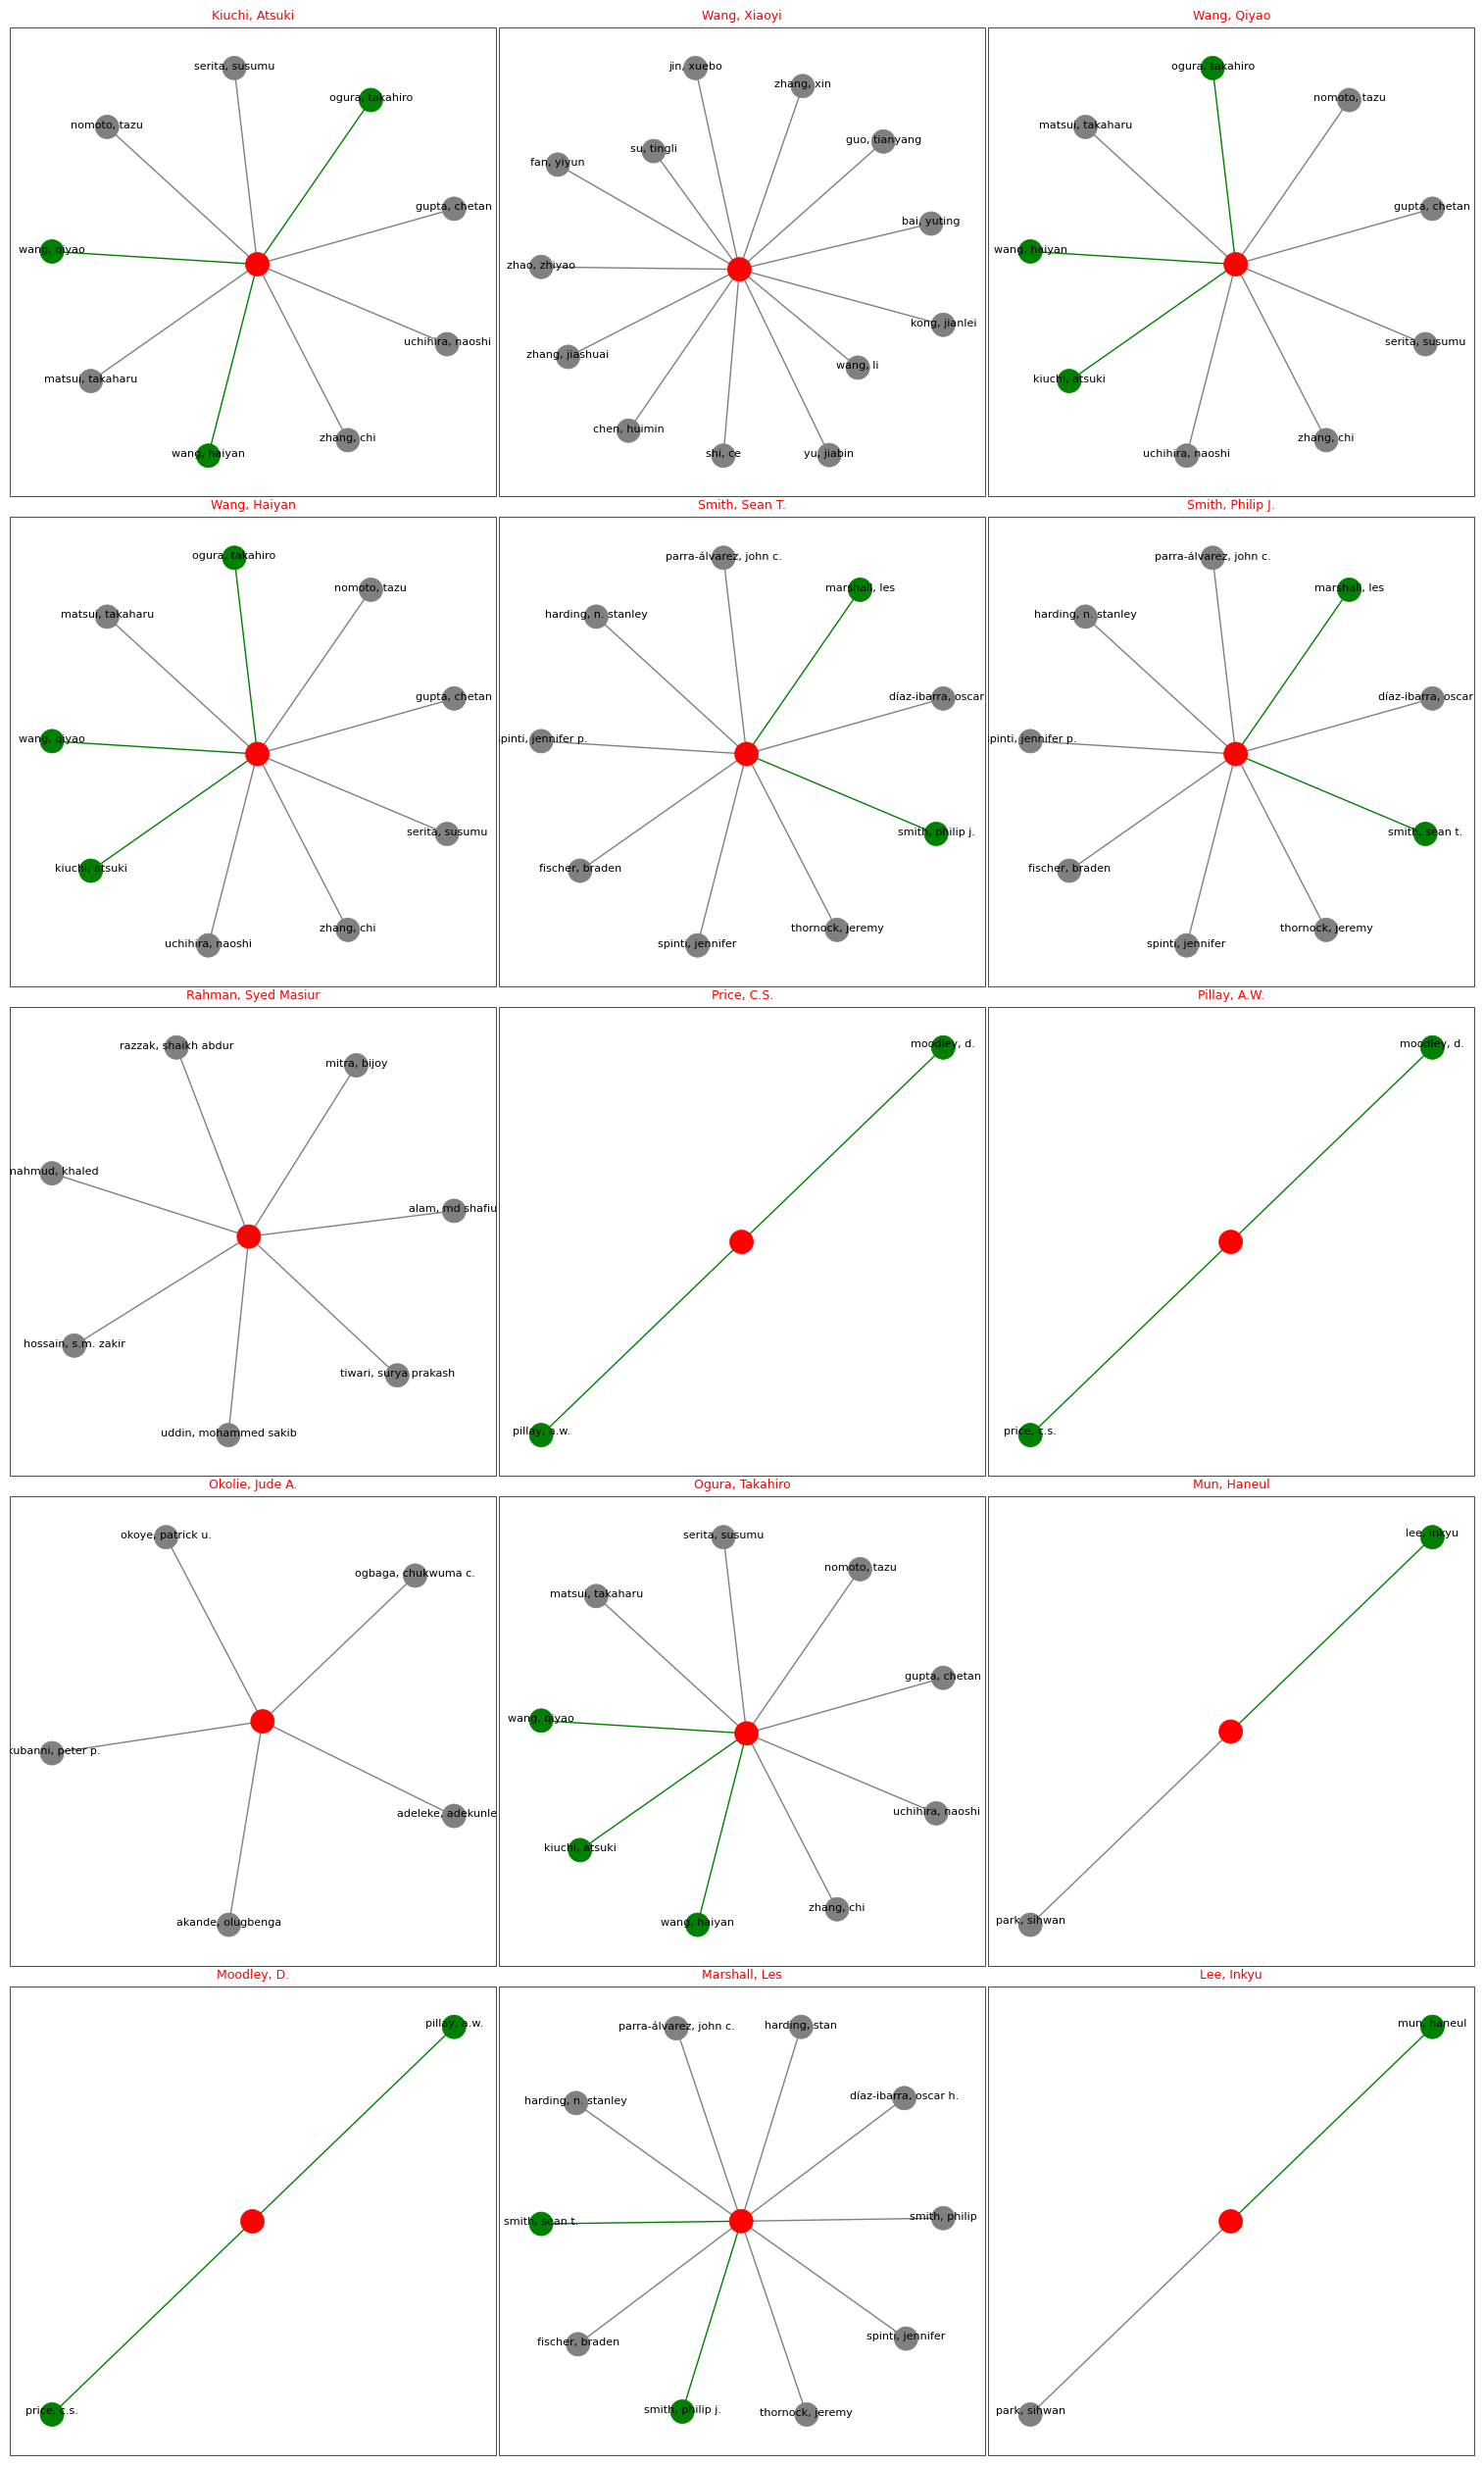

In [57]:
# Arguments:
# entry      = 'aut', 'cout', 'inst', 'kwa', or 'kwp'.
# tgt        = List of specific names.
# topn       = Integer. Specifies the number of top authors to display based on their total contributions.
# rows       = Integer. Defines the number of rows in the subplot grid for the visual layout.
# cols       = Integer. Defines the number of columns in the subplot grid for the visual layout.
# wspace     = Float. Adjusts horizontal spacing between subplots.
# hspace     = Float. Adjusts vertical spacing between subplots.
# tspace     = Float. Sets additional vertical space between nodes and labels for better readability.
# node_size  = Integer. Controls the size of each node in the network graph.
# font_size  = Integer. Defines the font size for node labels.
# pad        = Float. Adjusts padding around the layout for a balanced appearance.
# nd_a       = Color string (e.g., '#FF0000'). Specifies the color for the primary node (main author).
# nd_b       = Color string (e.g., '#008000'). Specifies the color for secondary nodes (authors with significant links).
# nd_c       = Color string (e.g., '#808080'). Specifies the color for other nodes (authors with minor links).
# verbose    = Boolean. If True, prints details of each main node and its connections in the console; if False, suppresses this output.
bibfile.network_collab( entry     = 'aut',
                        tgt       = [],
                        topn      = 15,
                        rows      = 5,
                        cols      = 3,
                        wspace    = 0.2,
                        hspace    = 0.2,
                        tspace    = 0.01,
                        node_size = 300,
                        font_size = 8,
                        pad       = 0.2,
                        nd_a      = '#FF0000',
                        nd_b      = '#008000',
                        nd_c      = '#808080',
                        verbose   = False)

In [58]:
# Check Collab
print(bibfile.ask_gpt_ct)

[[['kiuchi, atsuki'], ['gupta, chetan', 'matsui, takaharu', 'nomoto, tazu', 'ogura, takahiro', 'serita, susumu', 'uchihira, naoshi', 'wang, haiyan', 'wang, qiyao', 'zhang, chi']], [['wang, xiaoyi'], ['bai, yuting', 'chen, huimin', 'fan, yiyun', 'guo, tianyang', 'jin, xuebo', 'kong, jianlei', 'shi, ce', 'su, tingli', 'wang, li', 'yu, jiabin', 'zhang, jiashuai', 'zhang, xin', 'zhao, zhiyao']], [['wang, qiyao'], ['gupta, chetan', 'kiuchi, atsuki', 'matsui, takaharu', 'nomoto, tazu', 'ogura, takahiro', 'serita, susumu', 'uchihira, naoshi', 'wang, haiyan', 'zhang, chi']], [['wang, haiyan'], ['gupta, chetan', 'kiuchi, atsuki', 'matsui, takaharu', 'nomoto, tazu', 'ogura, takahiro', 'serita, susumu', 'uchihira, naoshi', 'wang, qiyao', 'zhang, chi']], [['smith, sean t.'], ['díaz-ibarra, oscar h.', 'fischer, braden', 'harding, n. stanley', 'marshall, les', 'parra-álvarez, john c.', 'smith, philip j.', 'spinti, jennifer', 'spinti, jennifer p.', 'thornock, jeremy']], [['smith, philip j.'], ['díaz-

In [59]:
# Network - Citation Analisys Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have been cited at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            node_size   = Integer. Value for node size;
#            font_size   = Integer. Defines the font size for node labels;
#            local_nodes = True or False (True -> Only the blue will be displayed, False -> Red and Blue nodes will be displayed)
bibfile.network_adj_dir(view = 'notebook', min_count = 7, node_labels = True, node_size = 20, font_size = 10, local_nodes = False)

In [60]:
# View Table
data_nad = bibfile.ask_gpt_nad
data_table.DataTable(data_nad, num_rows_per_page = 15)

In [61]:
# Network - Highlight Citation Analysis Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            article_ids = A list of Blue Nodes. It indicates the documents cited by them;
#            ref_ids     = A list of Red Nodes. It indicates the documents that cites them;
#            font_size   = Integer. Defines the font size for node labels;
#            node_size   = Integer. Value for node size
bibfile.find_nodes_dir(view = 'notebook', article_ids = [], ref_ids = [], node_size = 20, font_size = 10)

In [62]:
# Network - Highlight Citation Analysis Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            article_ids = A list of Blue Nodes. It indicates the documents cited by them;
#            ref_ids     = A list of Red Nodes. It indicates the documents that cites them;
#            font_size   = Integer. Defines the font size for node labels;
#            node_size   = Integer. Value for node size
bibfile.find_nodes_dir(view = 'notebook', article_ids = [], ref_ids = [], node_size = 20, font_size = 10)

In [63]:
# Network - Local Documents (Only Blue Nodes) Citation History. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_links   = Relationship between nodes that have connected at least x times;
#            node_size   = Integer. Value for node size;
#            font_size   = Integer. Defines the font size for node labels;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            chain       = A list of documents. It shows the documents and their citations;
#            path       =  Only relevant if 'chain' is not empty. True -> Show only the documents in 'chain'. False -> Show documents and connections.
citations = bibfile.network_hist(view = 'notebook', min_links = 0, chain = [], path = False, node_size = 20, font_size = 10, node_labels = True)

In [64]:
# View Table
data_hist = bibfile.ask_gpt_hist
data_table.DataTable(data_hist, num_rows_per_page = 15)

In [65]:
citations = bibfile.network_hist(view = 'notebook', min_links = 0, chain = [21, 258], path = False, node_size = 20, font_size = 10, node_labels = True)

In [66]:
citations = bibfile.network_hist(view = 'notebook', min_links = 0, chain = [3, 8, 56, 84, 120, 248], path = True, node_size = 20, font_size = 10, node_labels = True)

In [67]:
# Network - Analyze Hist. Citations
# Arguments: min_path_size = Minimum number of elements of a path.
hist_paths = bibfile.analyze_hist_citations(citations, min_path_size = 2)

Most Referenced Paper ID: None -> Cited 0 Times
Paper ID that Cites the Most: None -> Cites 0 Papers


In [68]:
# Network - Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            adj_type    = 'aut', 'cout', 'inst', 'kwa', or 'kwp'
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            label_type  = 'id', 'name' (Only meaningfull if node_labels = True. 'id' -> The ID will be displayed; 'name' -> The name will be displayed);
#            centrality  = 'degree', 'load', 'betw', 'close', 'eigen', 'katz', 'harmonic', or None. Color nodes according to centrality criterion
#                          'degree'   = Degree Centrality
#                          'load'     = Load Centrality
#                          'betw'     = Betweenness Centrality
#                          'close'    = Closeness Centrality
#                          'eigen'    = Eigenvector Centrality
#                          'katz'     = Katz Centrality
#                          'harmonic' = Harmonic Centrality
#                           None      = The Community Algorithm, Girvan-Newman, will be used Instead of a Centrality Criterion
bibfile.network_adj(view = 'notebook', adj_type = 'aut', min_count = 5, node_labels = True, label_type = 'name', centrality = None)

# PS: If a centrality criterion is used then the values can be obtained by the following command:  bibfile.table_centr

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [69]:
# View Table
data_adj = bibfile.ask_gpt_adj
data_table.DataTable(data_adj, num_rows_per_page = 20)

In [70]:
# Network - Highlight  Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view      = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            node_ids  = A list of IDs. Only meaningfull if label_type = 'id';
#            node_name = A list of Names. Only meaningfull iflabel_type = 'name';
#            node_only = True or False (True -> Only the Node will be Highlighted, False -> Node and its Connections will be Highlighted)
bibfile.find_nodes(node_ids = [], node_name = [], node_only = False)

In [71]:
# Network - Similarity Analysis using coupling or cocitation methods. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            sim_type    = 'coup', 'cocit' ('coup' -> Coupling Method, 'cocit' -> Cocitation Method)
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            cut_coup    = Cutoff value for Coupling Method. Only meaninfull if sim_type = 'coup';
#            cut_cocit   = Cutoff value for Cocitation Method. Only meaninfull if sim_type = 'cocit'
bibfile.network_sim(view = 'notebook', sim_type = 'cocit', node_size = 10, node_labels = True, cut_coup = 0.3, cut_cocit = 5)

In [72]:
# Check Similarity Values
data_table.DataTable(bibfile.sim_table, num_rows_per_page = 15)

In [73]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = True, country_lst = [])

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [74]:
# View Table
data_map = bibfile.ask_gpt_map
data_table.DataTable(data_map, num_rows_per_page = 15)

In [75]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = False, country_lst = ['Colombia'])

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



# Artificial Intelligence Analysis
---
In this section, we will perform AI Analysis

In [76]:
# NLP
# Arguments: corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            model             = Specifies the used AI model. The default value is 'allenai/scibert_scivocab_uncased'
bibfile.create_embeddings(stop_words = ['en'], rmv_custom_words = [], corpus_type = 'abs', model = 'allenai/scibert_scivocab_uncased')
emb = bibfile.embds

In [77]:
# NLP #-1 refers to all outliers and should typically be ignored.
# Arguments: stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                              'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                              'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                              'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainianian;   'es' =  Spanish;  'sv' = Swedish
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            embeddings        = True or False. If True then word embeddings are used to create the topics
#            model             = Specifies the used AI model. The default value is 'allenai/scibert_scivocab_uncased'
bibfile.topics_creation(stop_words = ['en'], rmv_custom_words = [], embeddings = False, model = 'allenai/scibert_scivocab_uncased')

   Topic  Count                                    Name  \
0     -1      9  -1_model_bayesian_supply_distributions   
1      0     67   0_model_biomass_optimization_bayesian   
2      1     36             1_supply_demand_model_chain   

                                      Representation  \
0  [model, bayesian, supply, distributions, risk,...   
1  [model, biomass, optimization, bayesian, based...   
2  [supply, demand, model, chain, data, optimizat...   

                                 Representative_Docs  
0  [numerous practical domains reliability perfor...  
1  [amid escalating demand alternatives petroleum...  
2  [demand forecasting produces valuable informat...  


In [78]:
# Authors Production per Topic
production_topics = bibfile.topics_authors(topn = 15)
production_topics

-1  0  1  Total
kiuchi, atsuki        0  0  3      3
wang, xiaoyi          1  0  1      2
wang, qiyao           0  0  2      2
wang, haiyan          0  0  2      2
smith, sean t.        1  1  0      2
smith, philip j.      1  1  0      2
rahman, syed masiur   0  2  0      2
price, c.s.           2  0  0      2
pillay, a.w.          2  0  0      2
okolie, jude a.       0  2  0      2
ogura, takahiro       0  0  2      2
mun, haneul           0  2  0      2
moodley, d.           2  0  0      2
marshall, les         1  1  0      2
lee, inkyu            0  2  0      2

In [79]:
# NLP
# Each document Topic
topics = bibfile.topics

In [80]:
# NLP
# Each document Probability to belong a Topic
probs = bibfile.probs

In [81]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_distribution(view = 'notebook')

In [82]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics(view = 'notebook')

In [83]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_projection(view = 'notebook')

In [84]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_heatmap(view = 'notebook')

In [85]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_time(view = 'notebook')

In [86]:
# NLP
bibfile.topics_representatives()

Topic       Docs
0   -1.0           
1    0.0  5; 15; 83
2    1.0  2; 49; 56

In [87]:
# NLP
similar_topics, similarity = bibfile.topic_model.find_topics('electre', top_n = 10)
for i in range(0, len(similar_topics)):
  print('Topic: ', similar_topics[i], 'Correlation: ', round(similarity[i], 3))

Topic:  -1 Correlation:  0.061
Topic:  0 Correlation:  0.051
Topic:  1 Correlation:  0.039


In [88]:
# NLP
# Arguments: doc_id = Article ID. For the specified article, this function evaluates how each word in its abstract semantically aligns with all topics in the model.
df = bibfile.topics_words(doc_id = 42)
df

Topic 0   Topic 1
Fluctuations                                            0.0  0.000000
in                                                      0.0  0.000000
raw                                                     0.0  0.000000
material                                                0.0  0.000000
utilization                                             0.0  0.000000
...                                                     ...       ...
data                                           ...      0.0  0.482553
driven                                         ...      0.0  0.352283
decision                                       ...      0.0  0.233386
making                                         ...      0.0  0.113964
Authors                                        ...      0.0  0.000000

[265 rows x 2 columns]

In [89]:
# NLP
bibfile.topic_model.save('my_topic_model')
#loaded_topic_model = BERTopic.load('my_topic_model')

2025-08-19 04:03:41,890 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [90]:
# W2V
model, corpus, w_emb, vocab = bibfile.word_embeddings(stop_words        = ['en'],
                                                      lowercase         = True,
                                                      rmv_accents       = True,
                                                      rmv_special_chars = False,
                                                      rmv_numbers       = True,
                                                      rmv_custom_words  = [],
                                                      vector_size       = 100,
                                                      window            = 5,
                                                      min_count         = 1,
                                                      epochs            = 10)

In [91]:
# W2V - Similarity
similarity = bibfile.word_embeddings_sim(model, word_1 = 'optimization', word_2 = 'waste')
similarity

0.99997437

In [92]:
# W2V - Find Docs
results = bibfile.word_embeddings_find_doc(corpus, target_words = ['optimization', 'biomass'])
results

[(1,
  'The economic viability of renewable energy is deteriorating due to its curtailment in power systems. Therefore, it is imperative to forecast curtailments for more effective utilization. To alleviate this issue, in this paper, we propose artificial intelligent-based models to accurately predict wind and solar power curtailments (WSPCs), which have not been investigated before. In this regard, a prediction methodology is developed using different types of machine learning (ML) methods and evaluated based on both hold-out (HO) and cross-validation (CV) approaches. The ML methods considered include regression trees (RT), gradient boosting trees (GBT), random forest (RF), feed-forward artificial neural networks (ANN), long short-term memory (LSTM), and support vector machines (SVR). The prediction models are trained based on eight input features, including load demands, the output power of thermal power plants, nuclear units, solar farms, wind turbines, biomass/geothermal units, lar

In [93]:
# W2V - Operations
operations = bibfile.word_embeddings_operations(model, positive = ['mcda', 'group'], negative = ['risk'], topn = 10)
operations

[('msi', 0.9946235418319702),
 ('elms', 0.9945717453956604),
 ('hard', 0.9945612549781799),
 ('sixteen', 0.9945468306541443),
 ('oils', 0.9944977760314941),
 ('shrubs', 0.9944950342178345),
 ('due', 0.9944921731948853),
 ('wide', 0.9944918155670166),
 ('span', 0.9944896101951599),
 ('dispatch', 0.9944866299629211)]

In [94]:
# W2V - Operations Plot.
bibfile.plot_word_embeddings(model,
                             view      = 'notebook',
                             positive  = [ ['mcda', 'group'], ['decision'],             ['group']],
                             negative  = [ ['risk'],          ['research', 'analysis'], []       ],
                             topn      = 3,
                             node_size = 10,
                             font_size = 14)

In [95]:
# NLP - Abstractive Summarization
# Arguments: article_ids = A list of documents to perform an abstractive summarization with the available abstracts. If the list is empty then all documents will be used
#            model_name  = Available pre-trained models. Complete list is available at  https://huggingface.co/models?pipeline_tag=summarization&sort=downloads&search=pegasus
abs_summary = bibfile.summarize_abst_peg(article_ids = [], model_name = 'google/pegasus-xsum')


Total Number of Valid Abstracts:  112



Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [96]:
# NLP - Check Abstractive Summarization
print(textwrap.fill(abs_summary, 150))

The health care supply chain is one of the world's largest and most complex networks of people, goods, and services working together to meet the needs
of the patient and the healthcare provider alike..,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [97]:
# NLP - Abstractive Summarization - chatGPT

# OBS 1: Requires the user to have an **API key** (https://platform.openai.com/account/api-keys))
# OBS 2: The limit of characters is 4097 per request

# Arguments: article_ids   = A list of documents to perform an abstractive summarization with the available abstracts. If the list is empty then all documents will be used
#            join_articles = If False then the abstracts will be analyzed separately. If True then the abstracts will be concate in a single text
#            api_key       = 'your_api_key_here'. Insert your personal API key (https://platform.openai.com/account/api-keys)
#            model         = Specifies the AI model used for text generation. The default value is "text-davinci-003"
#            query         = Ask chatGPT what you want to do with the abstracts. The default query is: 'from the following scientific abstracts, summarize the main information in a single paragraph using around 250 words'
abs_summary_chat = bibfile.summarize_abst_chatgpt(article_ids = [], join_articles = True, api_key = 'your_api_key_here', query = 'from the following scientific abstracts, summarize the main information in a single paragraph using around 250 words', model = 'gpt-4')

Document ID0 Number of Characters: 1391
Document ID1 Number of Characters: 1573
Document ID2 Number of Characters: 1410
Document ID3 Number of Characters: 1787
Document ID4 Number of Characters: 1436
Document ID5 Number of Characters: 2111
Document ID6 Number of Characters: 1671
Document ID7 Number of Characters: 1083
Document ID8 Number of Characters: 1631
Document ID9 Number of Characters: 1009
Document ID10 Number of Characters: 1285
Document ID11 Number of Characters: 1145
Document ID12 Number of Characters: 2007
Document ID13 Number of Characters: 1632
Document ID14 Number of Characters: 1948
Document ID15 Number of Characters: 2028
Document ID16 Number of Characters: 1767
Document ID17 Number of Characters: 1044
Document ID18 Number of Characters: 1464
Document ID19 Number of Characters: 1089
Document ID20 Number of Characters: 1922
Document ID21 Number of Characters: 1076
Document ID22 Number of Characters: 2424
Document ID23 Number of Characters: 1377
Document ID24 Number of Ch

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: your_api*****here. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

In [98]:
# NLP - Check Abstractive Summarization
print(textwrap.fill(abs_summary_chat, 250))

NameError: name 'abs_summary_chat' is not defined

In [99]:
# NLP - Extractive Summarization
# Arguments: article_ids = A list of documents to perform an extractive summarization with the available abstracts. If the list is empty then all documents will be used
ext_summary = bibfile.summarize_ext_bert(article_ids = [])


Total Number of Valid Abstracts:  112



In [100]:
# NLP - Check Extractive Summarization
print(textwrap.fill(ext_summary, 150))

From the development and sale of a product through its delivery to the end customer, the supply chain encompasses a network of suppliers,
transporters, warehouses, distribution centers, shipping lines, and logistics service providers all working together. © 2022 by the authors.
Therefore, it is imperative to forecast curtailments for more effective utilization. Based on historical data, i.e., hourly records of California
independent system operator (ISO), the predictive models are validated, and the optimal hyperparameters are chosen using Bayesian optimization for
each model to attain the best results. Among all the models, the RF model results in the minimum prediction errors and thus the best performance by
implementing the proposed CV approach. The proposed method consists of wavelet decomposition in the first step. The obtained results have been
compared with the results of Support Vector Machine (SVM), Decision Tree, Boosted Tree, and Random Forest forecasting models optimized us

# Correction and Data Manipulation
---
In this section, we will show how to Correct & Manipulate your Data

In [101]:
# Filter the .bib File
# Arguments: document = A list of documents to retain. The other documents will be deleted
#            doc_type = A list of doc types. Check the 'report' to select the available types;
#            year_str = An integer the determines the starting year of collection -1 = All years;
#            year_end = An integer the determines the ending year of collection   -1 = All years;
#            sources  = A list of sources. Check the cell '# Check Sources IDs' to select the available types;
#            core     = A integer (-1, 1, 2, 3, 12, or 23) -1 = All sources, 1 = Bradford core 1, 2 = Bradford core 2, 3 = Bradford core 3, 12 = Bradford core 1 and 2, 23 = Bradford core 2 and 3;
#            country  = A list of countries. Check the cell '# Check Countries IDs' to select the available types;
#            language = A list of languages. Check the 'report' to select the available types
#            abstract = True or False. True removes UNKNOW values from the abstract.
bibfile.filter_bib(documents = [], doc_type = [], year_str = -1, year_end = -1, sources = [], core = -1, country = [], language = [], abstract = False)

A Total of 112 Documents Remains

Article = 99
Conference paper = 13


In [102]:
# Correct the .bib File
# Arguments: get         = A list of the current name(s);
#            replace_for = A string. This string will replace all matchs from the 'get' argument list
bibfile.merge_author(get = [], replace_for = 'name')
bibfile.merge_institution(get = [], replace_for = 'name')
bibfile.merge_country(get = [], replace_for = 'name')
bibfile.merge_language(get = [], replace_for = 'name')
bibfile.merge_source(get = [], replace_for = 'name')
bibfile.merge_reference(get = [], replace_for = 'name')

In [103]:
# Work with modified .bib File

# 1) Input a .bib to instantiate a class => bibfile  = pbx_probe(file_bib = file_name, db = database, del_duplicated = True)
# 2) Then made the modifications and save the data externally => bibfile.save_database(sep = '\t', name = 'data.csv')
# 3) To load the modified .bib file ( 'data.csv') => bibfile.load_database(name = 'data.csv')

# PS: Even with the saved 'data.csv', you always need to do step 1, so to be fast, have any small .bib file in hand.
# Then, you can go directly to step 3, and your saved .bib ('data.csv') will replace the small .bib